# Reading and plotting data from WRF-PartMC netCDF file

In [1]:
import numpy as np
from netCDF4 import Dataset
import cartopy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import wrf

In [2]:
def apply_map_features(axes):
    ''' Adds map features '''
    axes.coastlines(resolution='50m', color='black', linewidth=1)
    states_provinces = cartopy.feature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    axes.add_feature(states_provinces, edgecolor='black')
    
    return

In [3]:
# Load netcdf file
data_dir = '/home/jcurtis2/hackathon_data/'
wrf_filename = '%straining.nc' % data_dir
ncf = Dataset(wrf_filename, "r", format="NETCDF4")

In [4]:
# WRF map projection
cart_proj = cartopy.crs.LambertConformal(central_longitude=-97,central_latitude=38)
# Data projection
data_proj = cartopy.crs.PlateCarree()

In [5]:
# Static data
lats = ncf.variables['XLAT'][0,:,:]
lons = ncf.variables['XLONG'][0,:,:]

In [6]:
ncf.variables.keys()

dict_keys(['ALT', 'ANOL', 'AONE', 'BIN_CENTERS', 'BIN_EDGES', 'CELL_VOL', 'CHI', 'CHI_CCN', 'CHI_CCN_BINNED', 'DN', 'DNW', 'D_ALPHA', 'D_ALPHA_CCN', 'D_ALPHA_CCN_BINNED', 'D_GAMMA', 'D_GAMMA_CCN', 'D_GAMMA_CCN_BINNED', 'ETHOOH', 'MAPFAC_M', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_U', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_V', 'MAPFAC_VX', 'MAPFAC_VY', 'MF_VX_INV', 'MU_U', 'MU_V', 'NUM_CONC', 'N_COMPONENTS', 'N_PARTS', 'O3P', 'OLEI', 'OLET', 'P', 'PB', 'PM25', 'RCOOH', 'REL_HUMID', 'RW', 'SULFHOX', 'T', 'TEMPERATURE', 'TOT_BC_NUM_CONC', 'TOT_BC_NUM_CONC_AGED', 'TOT_COAGULATION_NUM_CONC', 'TOT_HYDROPHOBIC_MASS_CONC', 'TOT_HYDROPHYLIC_MASS_CONC', 'TOT_MASS_CONC', 'TOT_NUM_CONC', 'TOT_NUM_CONC_COAGULATED', 'TOT_WET_NUM_CONC', 'Times', 'U', 'V', 'W', 'WW', 'XLAT', 'XLONG', 'Z', 'ZNU', 'ZNW', 'Z_AT_W', 'ald2', 'alk1', 'ano2', 'api', 'api1', 'api2', 'aro1', 'aro2', 'c2h6', 'c2o3', 'ccn_001', 'ccn_003', 'ccn_006', 'ccn_010', 'ccn_average_001', 'ccn_average_003', 'ccn_average_006', 'ccn_average_010', 'ch3

In [7]:
i_time = -1 # Scecify output time to plot
i_z = 0 # Specify level to plot

# Find the Feature Columns

In [8]:
SVARS = """X1 TOT_NUM_CONC Total aerosol number concentration
X2 TOT_MASS_CONC Total aerosol mass concentration
X3 pmc_SO4 SO4 mass concentration
X4 pmc_NO3 NO3 mass concentration
X5 pmc_Cl Cl mass concentration
X6 pmc_NH4 NH4 mass concentration
X7 pmc_ARO1 ARO1 mass concentration
X8 pmc_ARO2 ARO2 mass concentration
X9 pmc_ALK1 ALK1 mass concentration
X10 pmc_OLE1 OLE1 mass concentration
X11 pmc_API1 API1 mass concentration
X12 pmc_API2 API2 mass concentration
X13 pmc_LIM1 LIM1 mass concentration
X14 pmc_LIM2 LIM2 mass concentration
X15 pmc_OC OC mass concentration
X16 pmc_BC BC mass concentration
X17 pmc_H2O H2O mass concentration
X18 P+PB Total pressure
X19 TEMPERATURE Temperature
X20 REL_HUMID Relative humidity
X21 ALT Inverse density of air
X22 Z Height
X23 XLAT Latitude
X24 XLONG Longitude
X25 h2so4 h2so4 mixing ratio
X26 hno3 hno3 mixing ratio
X27 hcl hcl mixing ratio
X28 nh3 nh3 mixing ratio
X29 no no mixing ratio
X30 no2 no2 mixing ratio
X31 no3 no3 mixing ratio
X32 n2o5 n2o5 mixing ratio
X33 hono hono mixing ratio
X34 hno4 hno4 mixing ratio
X35 o3 o3 mixing ratio
X36 o1d o1d mixing ratio
X37 O3P O3P mixing ratio
X38 oh oh mixing ratio
X39 ho2 ho2 mixing ratio
X40 h2o2 h2o2 mixing ratio
X41 co co mixing ratio
X42 so2 so2 mixing ratio
X43 ch4 ch4 mixing ratio
X44 c2h6 c2h6 mixing ratio
X45 ch3o2 ch3o2 mixing ratio
X46 ethp ethp mixing ratio
X47 hcho hcho mixing ratio
X48 ch3oh ch3oh mixing ratio
X49 ANOL ANOL mixing ratio
X50 ch3ooh ch3ooh mixing ratio
X51 ETHOOH ETHOOH mixing ratio
X52 ald2 ald2 mixing ratio
X53 hcooh hcooh mixing ratio
X54 RCOOH RCOOH mixing ratio
X55 c2o3 c2o3 mixing ratio
X56 pan pan mixing ratio
X57 aro1 aro1 mixing ratio
X58 aro2 aro2 mixing ratio
X59 alk1 alk1 mixing ratio
X60 ole1 ole1 mixing ratio
X61 api1 api1 mixing ratio
X62 api2 api2 mixing ratio
X63 lim1 lim1 mixing ratio
X64 lim2 lim2 mixing ratio
X65 par par mixing ratio
X66 AONE AONE mixing ratio
X67 mgly mgly mixing ratio
X68 eth eth mixing ratio
X69 OLET OLET mixing ratio
X70 OLEI OLEI mixing ratio
X71 tol tol mixing ratio
X72 xyl xyl mixing ratio
X73 cres cres mixing ratio
X74 to2 to2 mixing ratio
X75 cro cro mixing ratio
X76 open open mixing ratio
X77 onit onit mixing ratio
X78 rooh rooh mixing ratio
X79 ro2 ro2 mixing ratio
X80 ano2 ano2 mixing ratio
X81 nap nap mixing ratio
X82 xo2 xo2 mixing ratio
X83 xpar xpar mixing ratio
X84 isop isop mixing ratio
X85 isoprd isoprd mixing ratio
X86 isopp isopp mixing ratio
X87 isopn isopn mixing ratio
X88 isopo2 isopo2 mixing ratio
X89 api api mixing ratio
X90 lim lim mixing ratio
X91 dms dms mixing ratio
X92 msa msa mixing ratio
X93 dmso dmso mixing ratio
X94 dmso2 dmso2 mixing ratio
X95 ch3so2h ch3so2h mixing ratio
X96 ch3sch2oo ch3sch2oo mixing ratio
X97 ch3so2 ch3so2 mixing ratio
X98 ch3so3 ch3so3 mixing ratio
X99 ch3so2oo ch3so2oo mixing ratio
X100 ch3so2ch2oo ch3so2ch2oo mixing ratio
X101 SULFHOX SULFHOX mixing ratio"""

feature_names = [s.split(" ")[1] for s in SVARS.split("\n")]

In [9]:
valid_features = []
for f in feature_names:
    if f in ncf.variables.keys():
        valid_features.append(f)
    else:
        print(f)
valid_features += ['P', 'PB']

P+PB


In [10]:
assert all([f in ncf.variables.keys() for f in valid_features])
valid_features

['TOT_NUM_CONC',
 'TOT_MASS_CONC',
 'pmc_SO4',
 'pmc_NO3',
 'pmc_Cl',
 'pmc_NH4',
 'pmc_ARO1',
 'pmc_ARO2',
 'pmc_ALK1',
 'pmc_OLE1',
 'pmc_API1',
 'pmc_API2',
 'pmc_LIM1',
 'pmc_LIM2',
 'pmc_OC',
 'pmc_BC',
 'pmc_H2O',
 'TEMPERATURE',
 'REL_HUMID',
 'ALT',
 'Z',
 'XLAT',
 'XLONG',
 'h2so4',
 'hno3',
 'hcl',
 'nh3',
 'no',
 'no2',
 'no3',
 'n2o5',
 'hono',
 'hno4',
 'o3',
 'o1d',
 'O3P',
 'oh',
 'ho2',
 'h2o2',
 'co',
 'so2',
 'ch4',
 'c2h6',
 'ch3o2',
 'ethp',
 'hcho',
 'ch3oh',
 'ANOL',
 'ch3ooh',
 'ETHOOH',
 'ald2',
 'hcooh',
 'RCOOH',
 'c2o3',
 'pan',
 'aro1',
 'aro2',
 'alk1',
 'ole1',
 'api1',
 'api2',
 'lim1',
 'lim2',
 'par',
 'AONE',
 'mgly',
 'eth',
 'OLET',
 'OLEI',
 'tol',
 'xyl',
 'cres',
 'to2',
 'cro',
 'open',
 'onit',
 'rooh',
 'ro2',
 'ano2',
 'nap',
 'xo2',
 'xpar',
 'isop',
 'isoprd',
 'isopp',
 'isopn',
 'isopo2',
 'api',
 'lim',
 'dms',
 'msa',
 'dmso',
 'dmso2',
 'ch3so2h',
 'ch3sch2oo',
 'ch3so2',
 'ch3so3',
 'ch3so2oo',
 'ch3so2ch2oo',
 'SULFHOX',
 'P',
 'PB']

In [11]:
norm = colors.LogNorm(1e-8,1e-2)

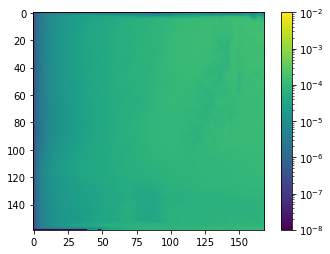

In [12]:
plt.imshow(ncf.variables["h2so4"][2,21,:,:],norm=norm)
plt.colorbar()

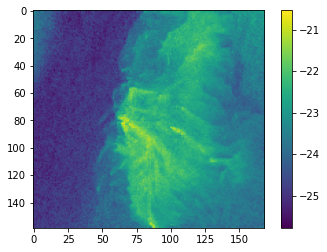

In [67]:
plt.imshow(np.log(ncf.variables["pmc_OC"][120,0,:,:]))
plt.colorbar()

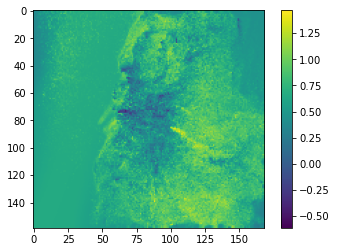

In [71]:
plt.imshow( np.log(ncf.variables["pmc_OC"][120,0,:,:]) - np.log(ncf.variables["pmc_BC"][120,0,:,:] ))
plt.colorbar()

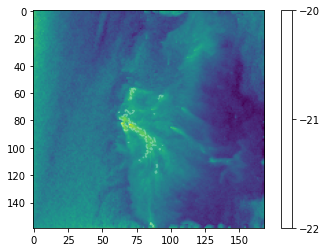

In [54]:
plt.imshow(np.log(ncf.variables["TOT_NUM_CONC"][120,0,:,:]))
plt.contour(np.log(ncf.variables["pmc_BC"][120,0,:,:]),colors='w', levels=[-22,-21,-20], alpha=0.3)
plt.colorbar()

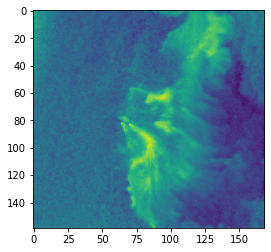

In [27]:
plt.imshow(np.log(ncf.variables["ccn_003"][120,0,:,:]) )

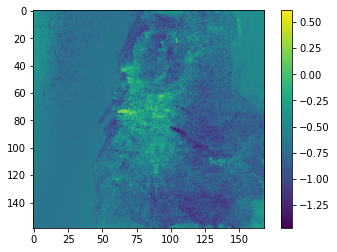

In [81]:
plt.imshow(np.log(ncf.variables["pmc_BC"][120,0,:,:])-np.log(ncf.variables["pmc_OC"][120,0,:,:]))
plt.colorbar()

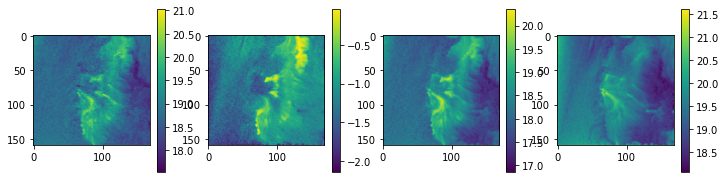

In [86]:
f,axes=plt.subplots(1,4,figsize=(12,3))
im0 = axes[0].imshow(np.log(ncf.variables["ccn_003"][120,0,:,:]) - (np.log(ncf.variables["pmc_BC"][120,0,:,:])-np.log(ncf.variables["pmc_OC"][120,0,:,:])))
f.colorbar(im0, ax=axes[0])
im1 = axes[1].imshow(np.log(ncf.variables["ccn_003"][120,0,:,:]) - np.log(ncf.variables["TOT_NUM_CONC"][120,0,:,:]))
f.colorbar(im1, ax=axes[1])

im2 = axes[2].imshow(np.log(ncf.variables["ccn_003"][120,0,:,:]) )
f.colorbar(im2, ax=axes[2])

im3 = axes[3].imshow(np.log(ncf.variables["TOT_NUM_CONC"][120,0,:,:]) )
f.colorbar(im3, ax=axes[3])

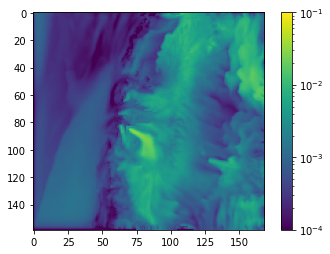

In [95]:
plt.imshow(ncf.variables["h2so4"][120,0,:,:],norm=norm)
plt.colorbar()

# Find the Target Columns

In [22]:
STARG = """Y1 ccn_001 cloud condensation nuclei (CCN) concentration at 0.1% supersaturation high
Y2 ccn_003 CCN concentration at 0.3% supersaturation high
Y3 ccn_006 CCN concentration at 0.6% supersaturation high
Y4 CHI Mixing state index based on CCN properties high
Y5 CHI_CCN Mixing state index based on chemical composition high
Y6 D_ALPHA α-diversity medium
Y7 D_GAMMA γ-diversity medium
Y8 D_ALPHA_CCN α-diversity based on CCN properties medium
Y9 D_GAMMA_CCN γ-diversity based on CCN properties medium
Y10 PM25"""
target_names = [s.split(" ")[1] for s in STARG.split("\n")]

In [72]:
assert all([t in ncf.variables.keys() for t in target_names])
target_names

['ccn_001',
 'ccn_003',
 'ccn_006',
 'CHI',
 'CHI_CCN',
 'D_ALPHA',
 'D_GAMMA',
 'D_ALPHA_CCN',
 'D_GAMMA_CCN',
 'PM25']

# Data Normalization


### Plot ozone mixing ratio

In [34]:
ncf.variables.keys()

dict_keys(['ALT', 'ANOL', 'AONE', 'BIN_CENTERS', 'BIN_EDGES', 'CELL_VOL', 'CHI', 'CHI_CCN', 'CHI_CCN_BINNED', 'DN', 'DNW', 'D_ALPHA', 'D_ALPHA_CCN', 'D_ALPHA_CCN_BINNED', 'D_GAMMA', 'D_GAMMA_CCN', 'D_GAMMA_CCN_BINNED', 'ETHOOH', 'MAPFAC_M', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_U', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_V', 'MAPFAC_VX', 'MAPFAC_VY', 'MF_VX_INV', 'MU_U', 'MU_V', 'NUM_CONC', 'N_COMPONENTS', 'N_PARTS', 'O3P', 'OLEI', 'OLET', 'P', 'PB', 'PM25', 'RCOOH', 'REL_HUMID', 'RW', 'SULFHOX', 'T', 'TEMPERATURE', 'TOT_BC_NUM_CONC', 'TOT_BC_NUM_CONC_AGED', 'TOT_COAGULATION_NUM_CONC', 'TOT_HYDROPHOBIC_MASS_CONC', 'TOT_HYDROPHYLIC_MASS_CONC', 'TOT_MASS_CONC', 'TOT_NUM_CONC', 'TOT_NUM_CONC_COAGULATED', 'TOT_WET_NUM_CONC', 'Times', 'U', 'V', 'W', 'WW', 'XLAT', 'XLONG', 'Z', 'ZNU', 'ZNW', 'Z_AT_W', 'ald2', 'alk1', 'ano2', 'api', 'api1', 'api2', 'aro1', 'aro2', 'c2h6', 'c2o3', 'ccn_001', 'ccn_003', 'ccn_006', 'ccn_010', 'ccn_average_001', 'ccn_average_003', 'ccn_average_006', 'ccn_average_010', 'ch3

In [ ]:
predict_vars = ['ccn_001'

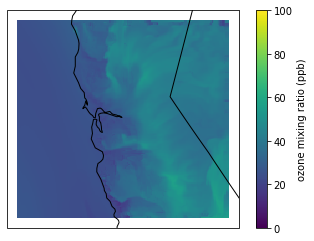

In [31]:
fig = plt.figure()
axes = fig.add_subplot(projection=cart_proj)
data = ncf.variables['o3']

norm = colors.Normalize(0,100)
c = axes.pcolormesh(lons,lats,data[i_time,i_z,:,:],
                       norm=norm,transform=data_proj)

apply_map_features(axes)
cbar = fig.colorbar(c)
cbar.set_label('ozone mixing ratio (ppb)')
fig.savefig('example_gas.pdf');

### Plot aerosol number concentration

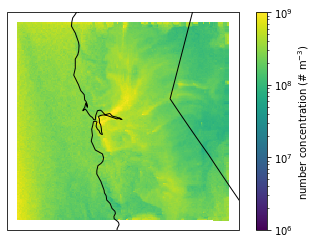

In [114]:
fig = plt.figure()
axes = fig.add_subplot(projection=cart_proj)
data = ncf.variables['TOT_NUM_CONC'][:]

norm = colors.LogNorm(1e6,1e9)
c = axes.pcolormesh(lons,lats,data[i_time,i_z,:,:],
                       norm=norm,transform=data_proj)

apply_map_features(axes)
cbar = fig.colorbar(c)
cbar.set_label('number concentration (# m$^{-3}$)')
fig.savefig('example_aerosols.pdf');

In [115]:
data.shape

(134, 39, 159, 169)

In [128]:
"".join(ncf.variables['Times'][0].data.astype(str))

'2010-06-18_00:00:00'

In [129]:
"".join(ncf.variables['Times'][-1].data.astype(str))

'2010-06-19_00:00:00'

### Selecting range of data

It will be necessary to exclude some of the data from the dataset. In particular, removing horizontal boundary conditions (domain edges).

In [9]:
(nt,nz,ny,nx) = data.shape
print(nt,nz,ny,nx)

x_s = 1
x_e = nx-1
y_s = 1
y_e = ny-1
z_s = 0
z_e = nz
t_s = 0
t_e = nt
print(data[t_s:t_e,z_s:z_e,y_s:y_e,x_s:x_e].shape)

134 39 159 169
(134, 39, 157, 167)


In [10]:
ncf.close() # Close netcdf file